# Proyek Analisis Data: Bike Rentals
- **Nama:** Gibran Faktian Anwar
- **Email:** gfaktian22@gmail.com
- **ID Dicoding:** gibran_faktian

## Menentukan Pertanyaan Bisnis

- Adakah pengaruh rata-rata kelembapan udara (humidty) per harinya dalam total penyewaan dan bagaimana cara mengatasinya jika penyewaan sedang turun dikarenakan kelembapan udara (humidity)?
- Apakah hari libur (not workingday) mengalami lonjakan penyewaan yang signifikan dari hari biasa (workingday) dan seperti apa trennya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

## Data Wrangling

### Gathering Data

- takes the csv file and inserts it into the DataFrame.

In [3]:
df = pd.read_csv("day.csv", delimiter=",") # read csv file in directory
df.head() # show 5 first row from 'df'

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


NOTE (definition of each column)

1. instant: record index
2. dteday : date
3. season : season (1:springer, 2:summer, 3:fall, 4:winter)
4. yr : year (0: 2011, 1:2012)
5. mnth : month ( 1 to 12)
6. hr : hour (0 to 23)
7. holiday : weather day is holiday or not (extracted from [Web Link])
8. weekday : day of the week
9. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
10. weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy. 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist. 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog. 
11. temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
12. atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
13. hum: Normalized humidity. The values are divided to 100 (max)
14. windspeed: Normalized wind speed. The values are divided to 67 (max)
15. casual: count of casual users
16. registered: count of registered users
17. cnt: count of total rental bikes including both casual and registered

### Assessing Data

- check the information contained in the csv file

In [4]:
df.info() # display important information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Date is still a data type object

- check if there are duplicates in the dataset.

In [5]:
print("current Duplicate data: ", df.duplicated().sum()) # search for duplicate data from the dataset

current Duplicate data:  0


- Checking missing values

In [6]:
df.isnull().sum() # find the missing value of each cell and then add them

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- checking the statistical value

In [7]:
df.describe() # Applying simple descriptive statistics

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- outlier checking using box plots in humidity

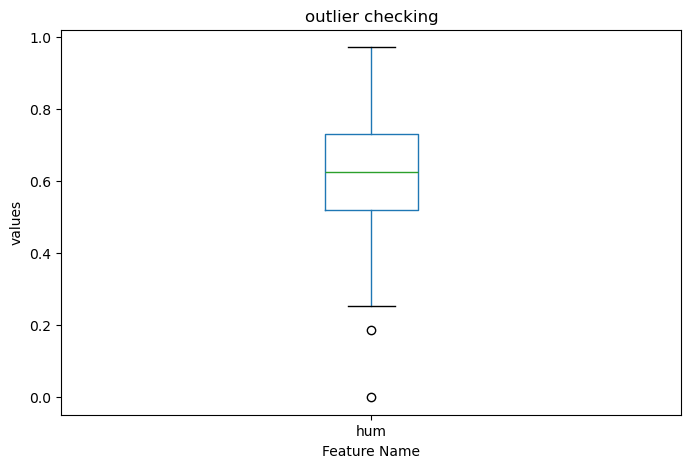

In [13]:
plt.figure(figsize=(8, 5)) # Make a figure with size (8x5), (x-axis, y-axis)
df.boxplot(column=['hum']) # call the feature name that we will use for analysis 
plt.title('outlier checking') #title
plt.ylabel('values') # label y-axis
plt.xlabel('Feature Name') # label x-axis
plt.grid(False) # not wearing a grid
plt.show()

few outliers were found in the humidity feature column

- outlier checking using box plots in count

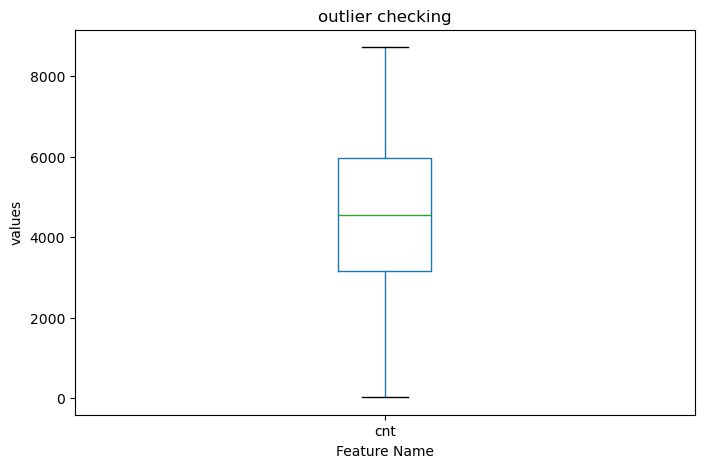

In [11]:
plt.figure(figsize=(8, 5)) # Make a figure with size (8x5), (x-axis, y-axis)
df.boxplot(column=['cnt']) # call the feature name that we will use for analysis 
plt.title('outlier checking') #title
plt.ylabel('values') # label y-axis
plt.xlabel('Feature Name') # label x-axis
plt.grid(False) # not wearing a grid
plt.show()

no outliers found in the feature count column

### Cleaning Data

- change the data type

In [14]:
df['dteday'] = pd.to_datetime(df['dteday']) # convert object data type to datetime
print(df['dteday'].dtype) # displays the data type of dteday

datetime64[ns]


- change the name field to make it easier to read

In [18]:
df.rename(columns={
    'dteday' : 'dateday', # Which date
    'yr' : 'year', # Which year 
    'mnth' : 'month', # Which month
    'weathersit' : 'weather_cond', # weather conditions at the time
    'hum' : 'humidity', # humidity per hour
    'registered' : 'registered_user', # number of registered users
    'casual' : 'casual_user', # number of casual users
    'cnt' : 'total_rental' # total rental per day (casual and registered)
}, inplace=True)

df.head() # show 5 first row

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,humidity,windspeed,casual_user,registered_user,total_rental
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- outlier removal

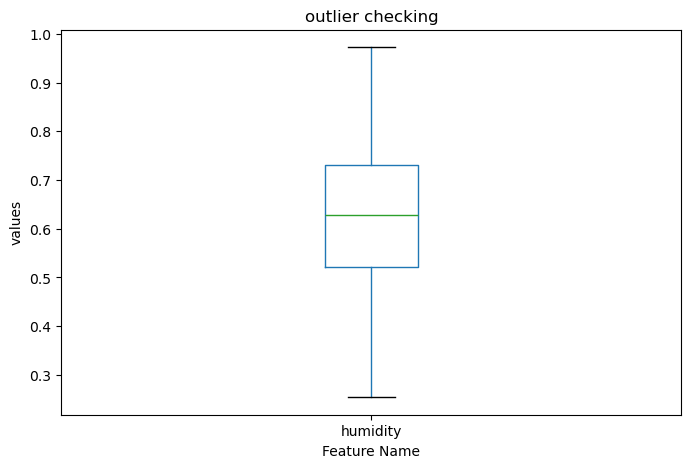

In [23]:
Q1 = (df['humidity']).quantile(0.25) # calculate the lower quartile (Q1) of the 'hum' column
Q3 = (df['humidity']).quantile(0.75) # calculate the lower quartile (Q3) of the 'hum' column
IQR = Q3 - Q1 # calculate the interquartile range (IQR)

min = Q1 - (1.5*IQR) # Calculates the lower bound value to determine the lower bound of the whiskers.
con_low = df['humidity'] < min # checks if the value in the hum column is less than the min value

df.drop(df[con_low].index, inplace=True) # Delete rows in DataFrame 'df' that have values smaller than min

# recheck the outliers that have been removed.
plt.figure(figsize=(8, 5)) # Make a figure with size (8x5), (x-axis, y-axis)
df.boxplot(column=['humidity']) # call the feature name that we will use for analysis 
plt.title('outlier checking') #title
plt.ylabel('values') # label y-axis
plt.xlabel('Feature Name') # label x-axis
plt.grid(False) # not wearing a grid
plt.show()

there are no outliers

- creates a new column containing the humidity interval

In [80]:
df['humidity_interval'] = pd.cut(df['humidity'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1], include_lowest=True, labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1'])

In [81]:
df['workingday'] = df['workingday'].replace({1: 'Weekday', 0: 'Holiday'})
df.head() # show 5 first row

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,humidity,windspeed,casual_user,registered_user,total_rental,humidity_interval
0,1,2011-01-01,1,0,1,0,6,Holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0.8-1
1,2,2011-01-02,1,0,1,0,0,Holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0.6-0.8
2,3,2011-01-03,1,0,1,0,1,Weekday,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0.4-0.6
3,4,2011-01-04,1,0,1,0,2,Weekday,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0.4-0.6
4,5,2011-01-05,1,0,1,0,3,Weekday,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0.4-0.6


- convert 'df' dataframe to CSV

In [82]:
df.to_csv('daycleaned.csv', index=False) # 'df' to daycleaned.csv

save DataFrame 'df' into a CSV file with the name 'daycleaned.csv'

## Exploratory Data Analysis (EDA)

- looking for some correlation between features in the heatmap

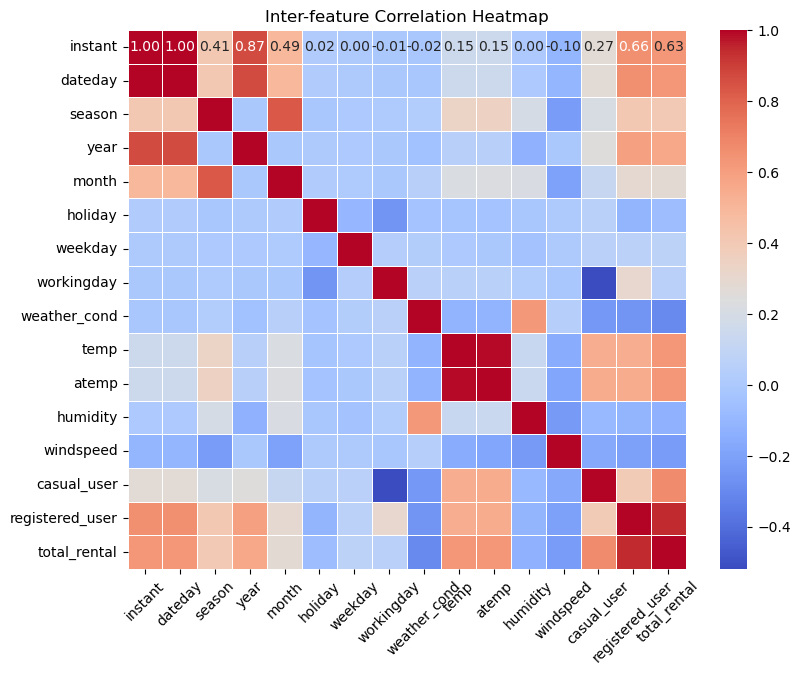

In [32]:
correlation_matrix = df.corr() # creates a variable that contains the correlation between features

plt.figure(figsize=(9, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.6)
plt.xticks(rotation=45) # rotate the font 45% on the x-axis
plt.title('Inter-feature Correlation Heatmap') #title
plt.show()

The 'humidity' feature has little correlation with total rentals.


Also the feature 'workingday' has little correlation with total rentals.

- check total_renting every month

In [47]:
result = df.groupby(by='month').agg({ # merge by month to total_rental
    'total_rental': 'sum'
})

print(result)

       total_rental
month              
1            134933
2            149717
3            228297
4            269094
5            331686
6            346342
7            344948
8            351194
9            345991
10           322352
11           254831
12           211036


- find out the effect of 'humidity' on rental

In [38]:
result = df.groupby(by="humidity_interval", observed=False).agg({ # grouping data based on the humidity_interval column.
    "registered_user": "sum",
    "casual_user": "sum", 
    "total_rental":  "sum"
})

sort_result = result.sort_values(by='total_rental', ascending=False) # saves the result into the DataFrame

print(sort_result) # print the result 

                   registered_user  casual_user  total_rental
humidity_interval                                            
0.6-0.8                    1221048       287919       1508967
0.4-0.6                    1090792       252754       1343546
0.8-1                       259189        53995        313184
0.2-0.4                      99953        24771        124724
0-0.2                            0            0             0


moderate air humidity plays an important role in bicycle rental

- Finding out the effect of holidays / weekdays on bicycle rentals

In [83]:
result = df.groupby(by="workingday", observed=False).agg({ # grouping data based on the workingday column.
    "registered_user": "sum",
    "casual_user": "sum", 
    "total_rental":  "sum"
})

sort_result2 = result.sort_values(by='total_rental', ascending=False) # saves the result into the DataFrame

print(sort_result2) # print the result

            registered_user  casual_user  total_rental
workingday                                            
Weekday             1988548       303239       2291787
Holiday              682434       316200        998634


Bicycle rentals increase during weekdays/non-holidays

## Visualization & Explanatory Analysis

### Pertanyaan 1: Adakah pengaruh rata-rata kelembapan udara (humidty) per harinya dalam total penyewaan dan bagaimana cara mengatasinya jika penyewaan sedang turun dikarenakan kelembapan udara (humidity)?

c:\Users\gfakt\.conda\envs\tensorflow\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


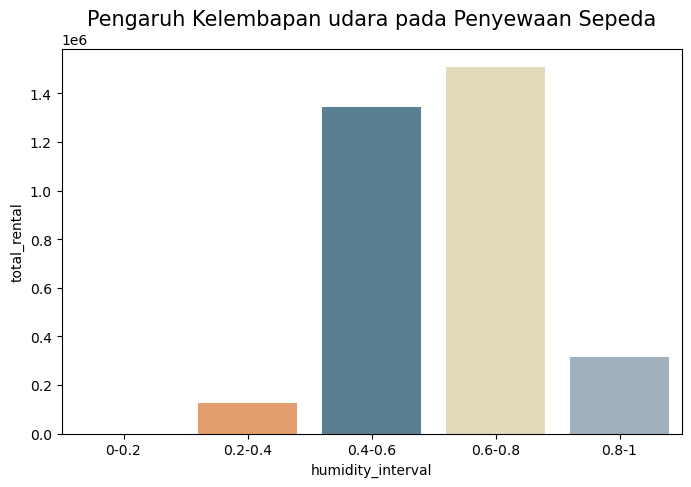

In [74]:
color = ["#FF3242", "#F6995C", "#51829B", "#EADFB4", "#9BB0C1"]
humidity_plot = df.groupby('humidity_interval', observed=False)['total_rental'].sum().reset_index() # merge humidity_interval to total_rental
plt.figure(figsize=(8, 5)) # fifure size
sns.barplot(data=humidity_plot,
            x="humidity_interval",
            y="total_rental",
            palette= color)
plt.title('Pengaruh Kelembapan udara pada Penyewaan Sepeda', fontsize=15) # title
plt.show()

Bedasarkan visualisasi data diatas, kelembapan udara (humidity) yang memiliki demand penyewaan tertinggi ialah kelembapan sedang yang dimana tidak terlalu tinggi maupun rendah. Udara yang rendah memiliki demand yang terkecil. lalu kelembapan yang tinggi cenderung sedikit juga demandnya.

### Pertanyaan 2: Apakah hari libur (not workingday) mengalami lonjakan penyewaan yang signifikan dari hari biasa (workingday) dan seperti apa trennya?

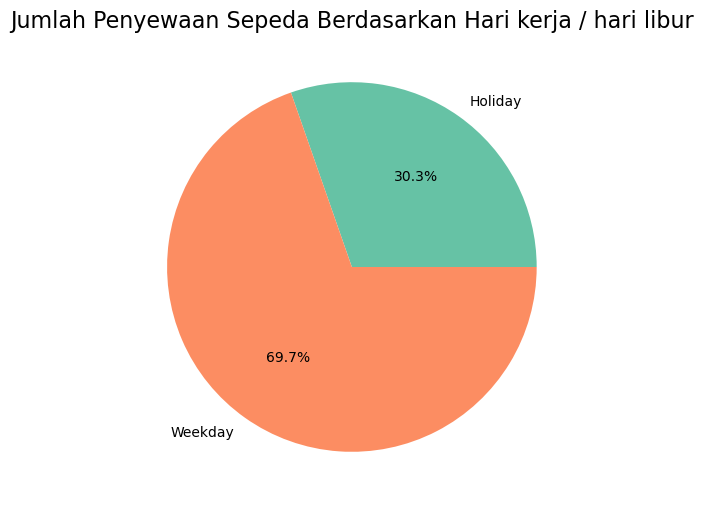

In [89]:
# Kelompokkan data berdasarkan 'Workingday' dan hitung total_count
workingday_plot = df.groupby('workingday')['total_rental'].sum().reset_index()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(workingday_plot['total_rental'], labels=workingday_plot['workingday'], autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari kerja / hari libur', fontsize=16)
plt.show()


bedasarkan dari visualisasi data di atas orang lebih cenderung menyewa sepeda ketika hari kerja. Yang dimana berarti orang menyewa sepeda bukan untuk liburan, mungkin bisa juga untuk dibawa kerja, dll

## Conclusion

- Adakah pengaruh rata-rata kelembapan udara (humidty) per harinya dalam total penyewaan dan bagaimana cara mengatasinya jika penyewaan sedang turun dikarenakan kelembapan udara (humidity)?


Dari apa yang sudah dianalysis di atas, ternyata kelembapan udara (humidity) memiliki peran juga terhadap penyewaan sepeda. orang mungkin tidak suka menyewa sepeda disaat kelembapan sedang tinggi maupun rendah yang dipengaruhi juga dengan cuaca per harinya. untuk mengatasinya mungkin bisa diberi promo yang menarik ketika sedang turun demandnya atau juga bisa menambahkan sepeda yang cocok untuk tiap musimnya, dikarenakan musim juga berpengaruh terhadap kelembapan udara

- Apakah hari libur (not workingday) mengalami lonjakan penyewaan yang signifikan dari hari biasa (workingday), seperti apa trennya?

Dari apa yang sudah dianalysis di atas, ternyata demand penyewaan sepeda melonjak secara signifikan pada hari kerja (workingday). Harusnya hari liburlah yang memiliki demand yang tinggi dikarenakan orang banyak yang tidak bekerja. mungkin orang-orang menyewa sepeda untuk dibawa kerja atau lainnya. mungkin untuk meningkatkan penjualan lagi bisa diberi promo menarik tiap hari libur dan juga kepada pekerja, yang menjadikan penjualan melonjak pada kedua hari tersebut.